# xGBoost Model on all numerical varibales with binary classification

In [1]:
import pickle
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Load dataset
with open("train_val_test_2.pkl", "rb") as f:
    X_train, X_val, X_test, y_train, y_val, y_test = pickle.load(f)

print("Data successfully loaded!")

Data successfully loaded!


In [3]:
# Calculate class imbalance for proper weighting
class_counts = np.bincount(y_train)
print(f"Class distribution: {class_counts}")
# scale_pos_weight gives more weight to the minority class (defaults)
scale_pos_weight = class_counts[0] / class_counts[1]
print(f"Calculated scale_pos_weight: {scale_pos_weight:.2f}")

Class distribution: [ 196256 1366829]
Calculated scale_pos_weight: 0.14


In [4]:
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",  
    tree_method="hist",          
    device="cuda",                     
    eval_metric=["auc", "aucpr", "error", "logloss"],            
    learning_rate=0.05,           
    n_estimators=500,             
    max_depth=6,                  
    min_child_weight=3,           # Increased to reduce overfitting
    gamma=0.2,                    # Light pruning to reduce overfitting
    subsample=0.7,                # More subsampling to reduce overfitting
    colsample_bytree=0.7,         # Create more diverse trees (randomly sampled features) to reduce overfitting
    scale_pos_weight=scale_pos_weight,
    reg_alpha=0.3,                
    reg_lambda=1.5,               
    random_state=1,
    enable_categorical=True,
    n_jobs=1,                     # 1 for GPU training
    early_stopping_rounds=30      # Training stops if no improvement in 30 rounds
)

eval_set = [(X_train, y_train), (X_val, y_val)]

start_time = time.time()

xgb_model.fit(
    X_train, 
    y_train,
    eval_set=eval_set,
    verbose=True,
)

training_time = time.time() - start_time
print(f"Model training completed in {training_time:.2f} seconds.")
print(f"Best iteration: {xgb_model.best_iteration}")
print(f"Best score: {xgb_model.best_score}")

/Users/yijiaowang/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [14:20:16] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[0]	validation_0-auc:0.66114	validation_0-aucpr:0.92706	validation_0-error:0.43009	validation_0-logloss:0.68923	validation_1-auc:0.65699	validation_1-aucpr:0.92558	validation_1-error:0.43103	validation_1-logloss:0.68928
[1]	validation_0-auc:0.66972	validation_0-aucpr:0.92934	validation_0-error:0.39747	validation_0-logloss:0.68563	validation_1-auc:0.66570	validation_1-aucpr:0.92790	validation_1-error:0.39804	validation_1-logloss:0.68572
[2]	validation_0-auc:0.67442	validation_0-aucpr:0.93055	validation_0-error:0.41052	validation_0-logloss:0.68236	validation_1-auc:0.67090	validation_1-aucpr:0.92930	validation_1-error:0.41122	validation_1-logloss:0.68251
[3]	validation_0-auc:0.67777	validation_0-aucpr:0.93160	validation_0-error:0.40576	validation_0-logloss:0.67922	validation_1-auc:0.67401	validation_1-aucpr:0.93025	validation_1-error:0.40722	validation_1-logloss:0.67942
[4]	validation_0-auc:0.68046	validation_0-aucpr:0.93236	validation_0-error:0.39750	validation_0-logloss:0.67631	validati

[38]	validation_0-auc:0.70550	validation_0-aucpr:0.93930	validation_0-error:0.36986	validation_0-logloss:0.63470	validation_1-auc:0.69969	validation_1-aucpr:0.93734	validation_1-error:0.37177	validation_1-logloss:0.63597
[39]	validation_0-auc:0.70606	validation_0-aucpr:0.93945	validation_0-error:0.36951	validation_0-logloss:0.63416	validation_1-auc:0.70017	validation_1-aucpr:0.93747	validation_1-error:0.37153	validation_1-logloss:0.63545
[40]	validation_0-auc:0.70655	validation_0-aucpr:0.93959	validation_0-error:0.36903	validation_0-logloss:0.63356	validation_1-auc:0.70059	validation_1-aucpr:0.93759	validation_1-error:0.37121	validation_1-logloss:0.63488
[41]	validation_0-auc:0.70728	validation_0-aucpr:0.93977	validation_0-error:0.36819	validation_0-logloss:0.63295	validation_1-auc:0.70129	validation_1-aucpr:0.93777	validation_1-error:0.37052	validation_1-logloss:0.63429
[42]	validation_0-auc:0.70766	validation_0-aucpr:0.93988	validation_0-error:0.36794	validation_0-logloss:0.63249	val

[76]	validation_0-auc:0.72276	validation_0-aucpr:0.94415	validation_0-error:0.35597	validation_0-logloss:0.61956	validation_1-auc:0.71515	validation_1-aucpr:0.94180	validation_1-error:0.35897	validation_1-logloss:0.62155
[77]	validation_0-auc:0.72306	validation_0-aucpr:0.94422	validation_0-error:0.35572	validation_0-logloss:0.61924	validation_1-auc:0.71536	validation_1-aucpr:0.94184	validation_1-error:0.35861	validation_1-logloss:0.62125
[78]	validation_0-auc:0.72332	validation_0-aucpr:0.94429	validation_0-error:0.35555	validation_0-logloss:0.61901	validation_1-auc:0.71558	validation_1-aucpr:0.94191	validation_1-error:0.35838	validation_1-logloss:0.62104
[79]	validation_0-auc:0.72360	validation_0-aucpr:0.94436	validation_0-error:0.35537	validation_0-logloss:0.61879	validation_1-auc:0.71581	validation_1-aucpr:0.94196	validation_1-error:0.35823	validation_1-logloss:0.62083
[80]	validation_0-auc:0.72381	validation_0-aucpr:0.94441	validation_0-error:0.35504	validation_0-logloss:0.61847	val

[114]	validation_0-auc:0.73500	validation_0-aucpr:0.94766	validation_0-error:0.34790	validation_0-logloss:0.60943	validation_1-auc:0.72624	validation_1-aucpr:0.94505	validation_1-error:0.35069	validation_1-logloss:0.61192
[115]	validation_0-auc:0.73520	validation_0-aucpr:0.94770	validation_0-error:0.34763	validation_0-logloss:0.60924	validation_1-auc:0.72642	validation_1-aucpr:0.94510	validation_1-error:0.35052	validation_1-logloss:0.61173
[116]	validation_0-auc:0.73571	validation_0-aucpr:0.94788	validation_0-error:0.34748	validation_0-logloss:0.60888	validation_1-auc:0.72692	validation_1-aucpr:0.94527	validation_1-error:0.35027	validation_1-logloss:0.61139
[117]	validation_0-auc:0.73583	validation_0-aucpr:0.94790	validation_0-error:0.34740	validation_0-logloss:0.60874	validation_1-auc:0.72701	validation_1-aucpr:0.94529	validation_1-error:0.35025	validation_1-logloss:0.61126
[118]	validation_0-auc:0.73596	validation_0-aucpr:0.94792	validation_0-error:0.34721	validation_0-logloss:0.6085

[151]	validation_0-auc:0.74339	validation_0-aucpr:0.95011	validation_0-error:0.34351	validation_0-logloss:0.60217	validation_1-auc:0.73372	validation_1-aucpr:0.94730	validation_1-error:0.34607	validation_1-logloss:0.60509
[152]	validation_0-auc:0.74357	validation_0-aucpr:0.95014	validation_0-error:0.34330	validation_0-logloss:0.60201	validation_1-auc:0.73385	validation_1-aucpr:0.94733	validation_1-error:0.34589	validation_1-logloss:0.60495
[153]	validation_0-auc:0.74395	validation_0-aucpr:0.95028	validation_0-error:0.34344	validation_0-logloss:0.60174	validation_1-auc:0.73424	validation_1-aucpr:0.94747	validation_1-error:0.34603	validation_1-logloss:0.60468
[154]	validation_0-auc:0.74447	validation_0-aucpr:0.95045	validation_0-error:0.34349	validation_0-logloss:0.60139	validation_1-auc:0.73475	validation_1-aucpr:0.94764	validation_1-error:0.34610	validation_1-logloss:0.60434
[155]	validation_0-auc:0.74467	validation_0-aucpr:0.95052	validation_0-error:0.34342	validation_0-logloss:0.6012

[188]	validation_0-auc:0.74967	validation_0-aucpr:0.95195	validation_0-error:0.34060	validation_0-logloss:0.59686	validation_1-auc:0.73907	validation_1-aucpr:0.94895	validation_1-error:0.34387	validation_1-logloss:0.60019
[189]	validation_0-auc:0.74979	validation_0-aucpr:0.95199	validation_0-error:0.34061	validation_0-logloss:0.59671	validation_1-auc:0.73919	validation_1-aucpr:0.94899	validation_1-error:0.34396	validation_1-logloss:0.60004
[190]	validation_0-auc:0.74988	validation_0-aucpr:0.95201	validation_0-error:0.34054	validation_0-logloss:0.59664	validation_1-auc:0.73924	validation_1-aucpr:0.94900	validation_1-error:0.34391	validation_1-logloss:0.59998
[191]	validation_0-auc:0.75012	validation_0-aucpr:0.95206	validation_0-error:0.34035	validation_0-logloss:0.59642	validation_1-auc:0.73945	validation_1-aucpr:0.94904	validation_1-error:0.34368	validation_1-logloss:0.59977
[192]	validation_0-auc:0.75030	validation_0-aucpr:0.95212	validation_0-error:0.34037	validation_0-logloss:0.5962

[225]	validation_0-auc:0.75419	validation_0-aucpr:0.95319	validation_0-error:0.33817	validation_0-logloss:0.59306	validation_1-auc:0.74263	validation_1-aucpr:0.94997	validation_1-error:0.34198	validation_1-logloss:0.59677
[226]	validation_0-auc:0.75437	validation_0-aucpr:0.95322	validation_0-error:0.33798	validation_0-logloss:0.59286	validation_1-auc:0.74278	validation_1-aucpr:0.95000	validation_1-error:0.34181	validation_1-logloss:0.59658
[227]	validation_0-auc:0.75443	validation_0-aucpr:0.95324	validation_0-error:0.33789	validation_0-logloss:0.59277	validation_1-auc:0.74281	validation_1-aucpr:0.95001	validation_1-error:0.34171	validation_1-logloss:0.59651
[228]	validation_0-auc:0.75454	validation_0-aucpr:0.95327	validation_0-error:0.33786	validation_0-logloss:0.59263	validation_1-auc:0.74290	validation_1-aucpr:0.95004	validation_1-error:0.34166	validation_1-logloss:0.59638
[229]	validation_0-auc:0.75460	validation_0-aucpr:0.95329	validation_0-error:0.33783	validation_0-logloss:0.5925

[262]	validation_0-auc:0.75902	validation_0-aucpr:0.95453	validation_0-error:0.33562	validation_0-logloss:0.58871	validation_1-auc:0.74655	validation_1-aucpr:0.95113	validation_1-error:0.33956	validation_1-logloss:0.59281
[263]	validation_0-auc:0.75918	validation_0-aucpr:0.95457	validation_0-error:0.33544	validation_0-logloss:0.58857	validation_1-auc:0.74670	validation_1-aucpr:0.95116	validation_1-error:0.33939	validation_1-logloss:0.59268
[264]	validation_0-auc:0.75944	validation_0-aucpr:0.95465	validation_0-error:0.33556	validation_0-logloss:0.58839	validation_1-auc:0.74695	validation_1-aucpr:0.95125	validation_1-error:0.33948	validation_1-logloss:0.59250
[265]	validation_0-auc:0.75951	validation_0-aucpr:0.95467	validation_0-error:0.33550	validation_0-logloss:0.58834	validation_1-auc:0.74697	validation_1-aucpr:0.95126	validation_1-error:0.33945	validation_1-logloss:0.59247
[266]	validation_0-auc:0.75955	validation_0-aucpr:0.95468	validation_0-error:0.33545	validation_0-logloss:0.5882

[299]	validation_0-auc:0.76268	validation_0-aucpr:0.95556	validation_0-error:0.33402	validation_0-logloss:0.58562	validation_1-auc:0.74927	validation_1-aucpr:0.95195	validation_1-error:0.33850	validation_1-logloss:0.59011
[300]	validation_0-auc:0.76271	validation_0-aucpr:0.95557	validation_0-error:0.33400	validation_0-logloss:0.58559	validation_1-auc:0.74929	validation_1-aucpr:0.95196	validation_1-error:0.33848	validation_1-logloss:0.59009
[301]	validation_0-auc:0.76282	validation_0-aucpr:0.95559	validation_0-error:0.33385	validation_0-logloss:0.58551	validation_1-auc:0.74937	validation_1-aucpr:0.95197	validation_1-error:0.33840	validation_1-logloss:0.59001
[302]	validation_0-auc:0.76288	validation_0-aucpr:0.95560	validation_0-error:0.33378	validation_0-logloss:0.58545	validation_1-auc:0.74939	validation_1-aucpr:0.95198	validation_1-error:0.33837	validation_1-logloss:0.58997
[303]	validation_0-auc:0.76294	validation_0-aucpr:0.95562	validation_0-error:0.33370	validation_0-logloss:0.5854

[336]	validation_0-auc:0.76549	validation_0-aucpr:0.95633	validation_0-error:0.33293	validation_0-logloss:0.58309	validation_1-auc:0.75113	validation_1-aucpr:0.95252	validation_1-error:0.33796	validation_1-logloss:0.58800
[337]	validation_0-auc:0.76567	validation_0-aucpr:0.95639	validation_0-error:0.33299	validation_0-logloss:0.58293	validation_1-auc:0.75130	validation_1-aucpr:0.95258	validation_1-error:0.33812	validation_1-logloss:0.58785
[338]	validation_0-auc:0.76570	validation_0-aucpr:0.95639	validation_0-error:0.33293	validation_0-logloss:0.58289	validation_1-auc:0.75131	validation_1-aucpr:0.95258	validation_1-error:0.33804	validation_1-logloss:0.58781
[339]	validation_0-auc:0.76578	validation_0-aucpr:0.95642	validation_0-error:0.33300	validation_0-logloss:0.58282	validation_1-auc:0.75138	validation_1-aucpr:0.95260	validation_1-error:0.33810	validation_1-logloss:0.58775
[340]	validation_0-auc:0.76581	validation_0-aucpr:0.95643	validation_0-error:0.33295	validation_0-logloss:0.5827

[373]	validation_0-auc:0.76791	validation_0-aucpr:0.95699	validation_0-error:0.33183	validation_0-logloss:0.58083	validation_1-auc:0.75260	validation_1-aucpr:0.95297	validation_1-error:0.33724	validation_1-logloss:0.58611
[374]	validation_0-auc:0.76794	validation_0-aucpr:0.95700	validation_0-error:0.33180	validation_0-logloss:0.58082	validation_1-auc:0.75261	validation_1-aucpr:0.95297	validation_1-error:0.33719	validation_1-logloss:0.58611
[375]	validation_0-auc:0.76808	validation_0-aucpr:0.95704	validation_0-error:0.33179	validation_0-logloss:0.58073	validation_1-auc:0.75272	validation_1-aucpr:0.95301	validation_1-error:0.33724	validation_1-logloss:0.58602
[376]	validation_0-auc:0.76812	validation_0-aucpr:0.95705	validation_0-error:0.33179	validation_0-logloss:0.58067	validation_1-auc:0.75275	validation_1-aucpr:0.95302	validation_1-error:0.33724	validation_1-logloss:0.58598
[377]	validation_0-auc:0.76817	validation_0-aucpr:0.95707	validation_0-error:0.33189	validation_0-logloss:0.5806

[410]	validation_0-auc:0.77001	validation_0-aucpr:0.95754	validation_0-error:0.33073	validation_0-logloss:0.57904	validation_1-auc:0.75375	validation_1-aucpr:0.95331	validation_1-error:0.33634	validation_1-logloss:0.58471
[411]	validation_0-auc:0.77003	validation_0-aucpr:0.95755	validation_0-error:0.33073	validation_0-logloss:0.57904	validation_1-auc:0.75375	validation_1-aucpr:0.95331	validation_1-error:0.33638	validation_1-logloss:0.58471
[412]	validation_0-auc:0.77006	validation_0-aucpr:0.95756	validation_0-error:0.33073	validation_0-logloss:0.57903	validation_1-auc:0.75376	validation_1-aucpr:0.95331	validation_1-error:0.33638	validation_1-logloss:0.58471
[413]	validation_0-auc:0.77010	validation_0-aucpr:0.95756	validation_0-error:0.33074	validation_0-logloss:0.57904	validation_1-auc:0.75377	validation_1-aucpr:0.95331	validation_1-error:0.33640	validation_1-logloss:0.58473
[414]	validation_0-auc:0.77018	validation_0-aucpr:0.95760	validation_0-error:0.33085	validation_0-logloss:0.5789

[447]	validation_0-auc:0.77214	validation_0-aucpr:0.95811	validation_0-error:0.32971	validation_0-logloss:0.57700	validation_1-auc:0.75502	validation_1-aucpr:0.95369	validation_1-error:0.33555	validation_1-logloss:0.58302
[448]	validation_0-auc:0.77217	validation_0-aucpr:0.95812	validation_0-error:0.32964	validation_0-logloss:0.57693	validation_1-auc:0.75503	validation_1-aucpr:0.95369	validation_1-error:0.33548	validation_1-logloss:0.58296
[449]	validation_0-auc:0.77220	validation_0-aucpr:0.95813	validation_0-error:0.32966	validation_0-logloss:0.57693	validation_1-auc:0.75504	validation_1-aucpr:0.95370	validation_1-error:0.33553	validation_1-logloss:0.58296
[450]	validation_0-auc:0.77226	validation_0-aucpr:0.95815	validation_0-error:0.32971	validation_0-logloss:0.57687	validation_1-auc:0.75510	validation_1-aucpr:0.95372	validation_1-error:0.33559	validation_1-logloss:0.58291
[451]	validation_0-auc:0.77231	validation_0-aucpr:0.95816	validation_0-error:0.32982	validation_0-logloss:0.5768

[484]	validation_0-auc:0.77387	validation_0-aucpr:0.95858	validation_0-error:0.32909	validation_0-logloss:0.57539	validation_1-auc:0.75590	validation_1-aucpr:0.95397	validation_1-error:0.33522	validation_1-logloss:0.58176
[485]	validation_0-auc:0.77391	validation_0-aucpr:0.95859	validation_0-error:0.32911	validation_0-logloss:0.57534	validation_1-auc:0.75593	validation_1-aucpr:0.95398	validation_1-error:0.33521	validation_1-logloss:0.58172
[486]	validation_0-auc:0.77395	validation_0-aucpr:0.95860	validation_0-error:0.32917	validation_0-logloss:0.57535	validation_1-auc:0.75596	validation_1-aucpr:0.95399	validation_1-error:0.33531	validation_1-logloss:0.58173
[487]	validation_0-auc:0.77398	validation_0-aucpr:0.95861	validation_0-error:0.32909	validation_0-logloss:0.57530	validation_1-auc:0.75596	validation_1-aucpr:0.95399	validation_1-error:0.33522	validation_1-logloss:0.58169
[488]	validation_0-auc:0.77405	validation_0-aucpr:0.95863	validation_0-error:0.32922	validation_0-logloss:0.5752

In [5]:
X_train.shape

(1563085, 59)

In [6]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6653


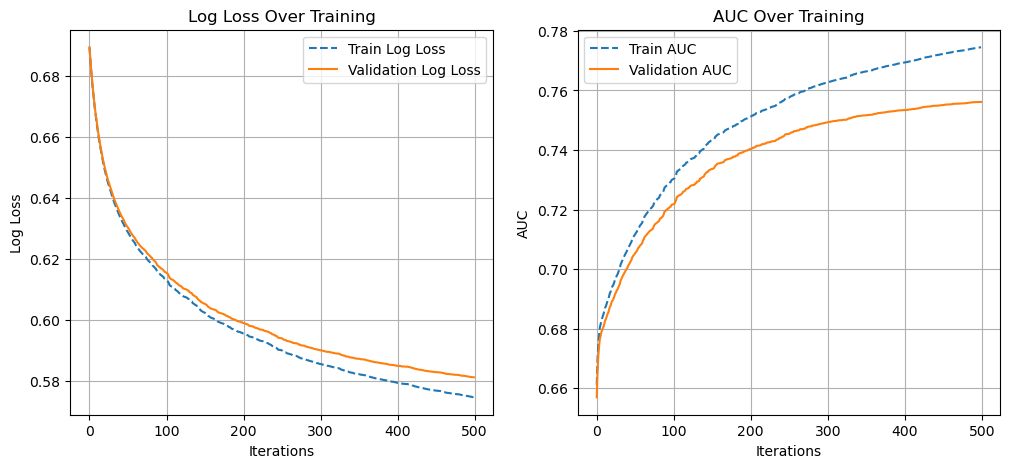

In [8]:
# Extract training history
evals_result = xgb_model.evals_result()

# Plot Learning Curves
plt.figure(figsize=(12, 5))

# Log Loss Curve
plt.subplot(1, 2, 1)
plt.plot(evals_result["validation_0"]["logloss"], label="Train Log Loss", linestyle="--")
plt.plot(evals_result["validation_1"]["logloss"], label="Validation Log Loss")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Log Loss Over Training")
plt.legend()
plt.grid()

# AUC Curve
plt.subplot(1, 2, 2)
plt.plot(evals_result["validation_0"]["auc"], label="Train AUC", linestyle="--")
plt.plot(evals_result["validation_1"]["auc"], label="Validation AUC")
plt.xlabel("Iterations")
plt.ylabel("AUC")
plt.title("AUC Over Training")
plt.legend()
plt.grid()

plt.show()

In [ ]:
'''
# Change different parameters
# Plot cross-validation results

evals_result = {}  # Dictionary to store results
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    #num_class=len(y_train.unique()),  
    tree_method="hist",  # Faster training
    enable_categorical=True,  # Use categorical support
    #use_label_encoder=False,
    eval_metric=["logloss", "error", "auc"],
    learning_rate=0.02, 
    n_estimators=1500,
    max_depth=6, 
    subsample=0.9, # Use 80% of the data per boosting iteration
    scale_pos_weight=6.96, # calculated from class0/class1 to resolve the imbalanced data
    early_stopping_rounds=100
)

# Train the model with early stopping
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Validation set
    verbose=True
)

print("Model training complete.")
'''

In [ ]:
## plot learning curve
results = xgb_model.evals_result()

# Define figure size
plt.figure(figsize=(12, 5))

# Plot Log Loss (logloss)
plt.subplot(1, 3, 1)
plt.plot(results["validation_0"]["logloss"], label="Train")
plt.plot(results["validation_0"]["logloss"], label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Log Loss over Time")
plt.legend()

# Plot Error Rate (error)
plt.subplot(1, 3, 2)
plt.plot(results["validation_0"]["error"], label="Train")
plt.plot(results["validation_0"]["error"], label="Validation")
plt.xlabel("Iterations")
plt.ylabel("Error Rate")
plt.title("Error Rate over Time")
plt.legend()

# Plot AUC (auc)
plt.subplot(1, 3, 3)
plt.plot(results["validation_0"]["auc"], label="Train")
plt.plot(results["validation_0"]["auc"], label="Validation")
plt.xlabel("Iterations")
plt.ylabel("AUC")
plt.title("AUC over Time")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

In [ ]:
# Make predictions on training and test sets
y_train_pred = xgb_model.predict(X_train)  # Predictions on training set
y_test_pred = xgb_model.predict(X_test)  # Predictions on test set

# Compute training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Compute training and test log loss
train_log_loss = log_loss(y_train, xgb_model.predict_proba(X_train))
test_log_loss = log_loss(y_test, xgb_model.predict_proba(X_test))

# Print results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Log Loss: {train_log_loss:.4f}")
print(f"Test Log Loss: {test_log_loss:.4f}")